In [1]:
import numpy as np
from scipy.signal import convolve2d as conv2

from skimage import color, data, restoration
import deconv as d
import graphics as g
import metrics as m

astro = color.rgb2gray(data.astronaut())

psf = np.ones((5, 5)) / 25
astro_blurred = conv2(astro, psf, 'same')
# Add Noise to Image
astro_noisy = astro_blurred.copy()
astro_noisy += (np.random.poisson(lam=25, size=astro.shape) - 10) / 255.

In [ ]:
mse_list = []
n = []
k = 5/100
for i in range(130,210):
    est = d.tykhonov(astro_noisy, psf, gamma=i*k)
    mse_list.append(m.MSE(astro, est))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n*k, mse_list, title='График ошибок')


In [ ]:
est1 = d.tykhonov(astro_noisy, psf, gamma=8.37)
g.plot3imgs(astro, astro_noisy, est1, suptitle='Тихоновская регуляризация')

In [ ]:
print('MSE между изначльным и повреждённым    =', m.MSE(astro, astro_noisy))
print('MSE между изначльным и восстановленным =', m.MSE(astro, est1))

In [ ]:
mae_list = []
n = []
k = 5/100
for i in range(60,140):
    est = d.tykhonov(astro_noisy, psf, gamma=i*k)
    mae_list.append(m.MAE(astro, est))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n*k, mae_list, title='График ошибок')

In [ ]:
est2 = d.tykhonov(astro_noisy, psf, gamma=5.6)
g.plot3imgs(astro, astro_noisy, est2, suptitle='Тихоновская регуляризация')

In [ ]:
print('MAE между изначльным и повреждённым    =', m.MAE(astro, astro_noisy))
print('MAE между изначльным и восстановленным =', m.MAE(astro, est1))

In [ ]:
g.plot3imgs(astro, est1, est2, suptitle='Тихоновская регуляризация')

In [ ]:
time_list = []
n = []
k = 0.05/100
for i in range(150,250):
    time = m.time_of_work(d.tykhonov, image = astro_noisy, psf = psf, gamma=i*k)
    time_list.append(time)

time_list = np.asarray(time_list)
print('Среднее время обработки одного изображения ', np.round(time_list.mean(), 3), 'c')

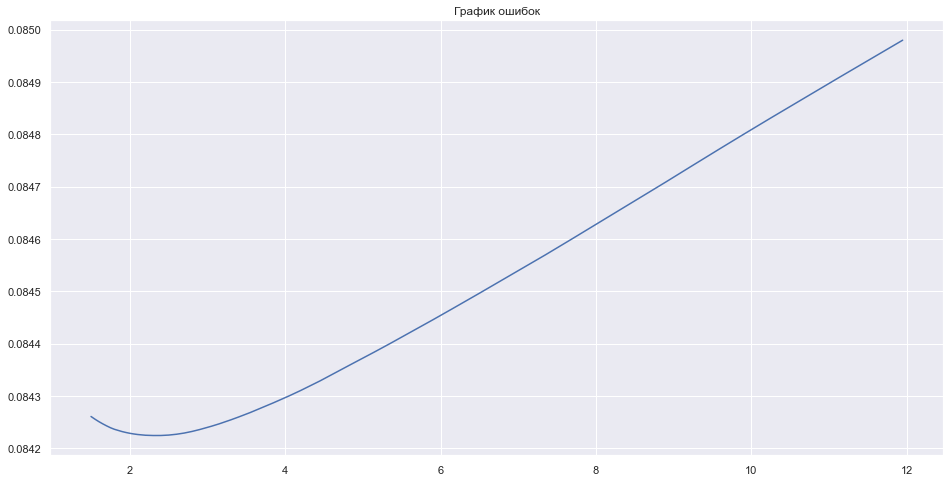

In [24]:
mae_list = []
n = []
k = 5/100
for i in range(30,240):
    est = d.tykhonov(astro_noisy, psf, gamma=i*k)
    mae_list.append(m.MAE_center(astro, est, n=100))
    n.append(i)

n = np.asarray(n)

g.plot_curve(n*k, mae_list, title='График ошибок')

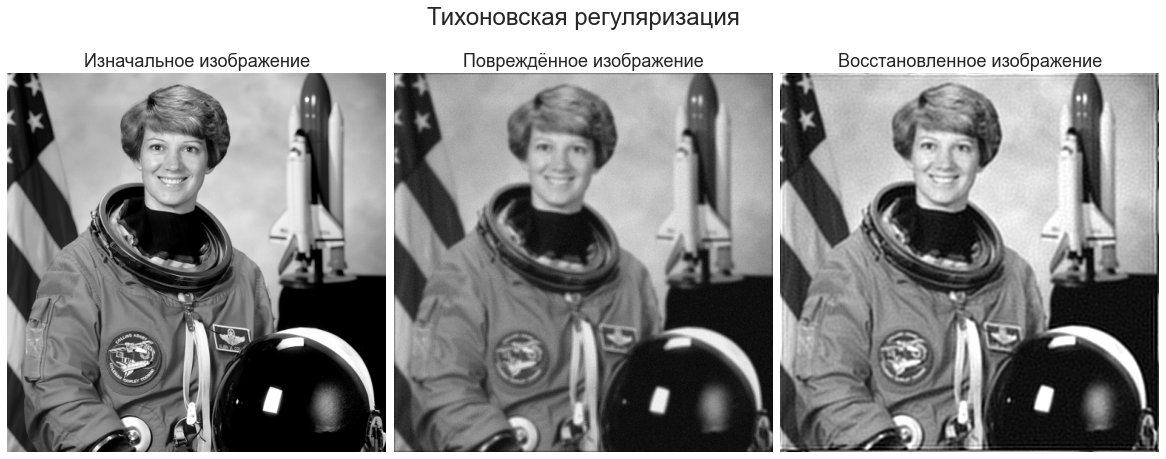

MAE между изначльным и повреждённым    = 0.07664575437803921
MAE между изначльным и восстановленным = 0.10477475811191482


In [31]:
est2 = d.tykhonov(astro_noisy, psf, gamma=0.05)
g.plot3imgs(astro, astro_noisy, est2, suptitle='Тихоновская регуляризация')
print('MAE между изначльным и повреждённым    =', m.MAE_center(astro, astro_noisy, n=50))
print('MAE между изначльным и восстановленным =', m.MAE_center(astro, est2, n=50))

In [2]:
asd = (np.random.poisson(lam=25, size=astro.shape) - 10) / 255

In [6]:
asd.mean()

0.05882082172468597